## Explanation about Bike Sharing in Washington D.C. Dataset

According to Hadi Fanaee-T of the Laboratory of Artificial Intelligence and Decision Support (from the liner notes on the UCI Machine Learning Repository’s Dataset Information):

The download contains two datasets: “hour.csv” and “day.csv.” Attribute Information:
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from [Web Link])
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

## Objectives
i will be building a simple and intutive way of interacting with environment factors such as temperature, wind, time and weather and analyze how they efect the bike rentals

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print(os.listdir("../input"))

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


['bike-sharing-dataset']


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preparation

In [3]:
day_df=pd.read_csv('../input/bike-sharing-dataset/day.csv')
hour_df=pd.read_csv('../input/bike-sharing-dataset/hour.csv')

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
day_df.drop('instant',axis=1,inplace=True)

## Data Visualization

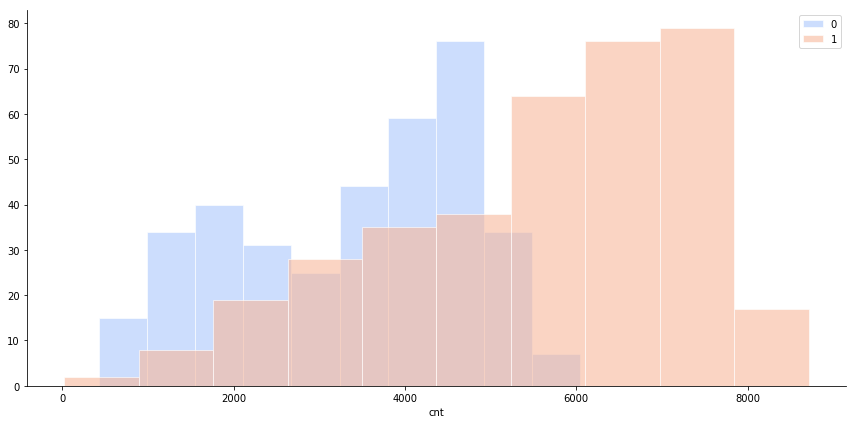

In [9]:
g=sns.FacetGrid(day_df, hue='yr', palette='coolwarm',height=6,aspect=2)
g=g.map(plt.hist,'cnt',alpha=0.6, edgecolor='w')
plt.legend()

Text(0.5, 1.0, 'Number of bikes rented per season')

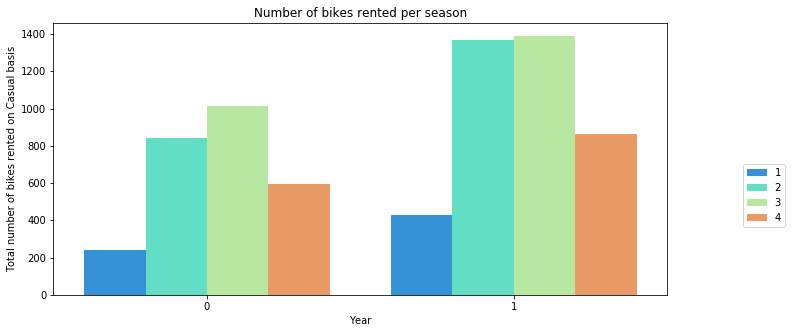

In [10]:
plt.figure(figsize=(11,5))
sns.barplot('yr','casual',hue='season', data=day_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Casual basis')
plt.title('Number of bikes rented per season')

In [11]:
df_season_winter=day_df[day_df['season']==4]
df_season_fall=day_df[day_df['season']==3]
df_season_summer=day_df[day_df['season']==2]
df_season_spring=day_df[day_df['season']==1]

In [12]:
df_season_winter.mnth.nunique()
df_season_fall.mnth.nunique()
df_season_summer.mnth.nunique()
df_season_spring.mnth.nunique()

4

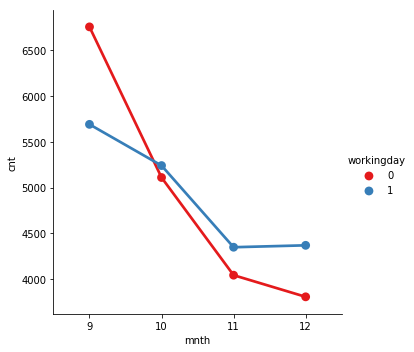

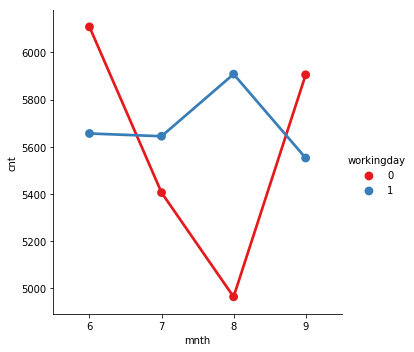

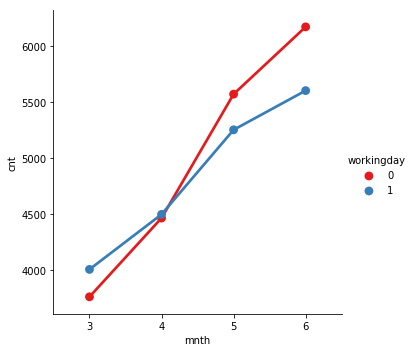

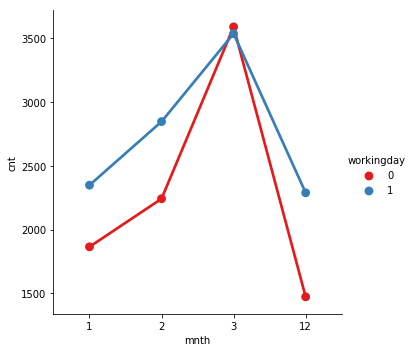

In [13]:
sns.factorplot('mnth','cnt',hue='workingday',data = df_season_winter, ci=None, palette='Set1')
sns.factorplot('mnth','cnt',hue='workingday',data = df_season_fall, ci=None, palette='Set1')
sns.factorplot('mnth','cnt',hue='workingday',data = df_season_summer, ci=None, palette='Set1')
sns.factorplot('mnth','cnt',hue='workingday',data = df_season_spring, ci=None, palette='Set1')

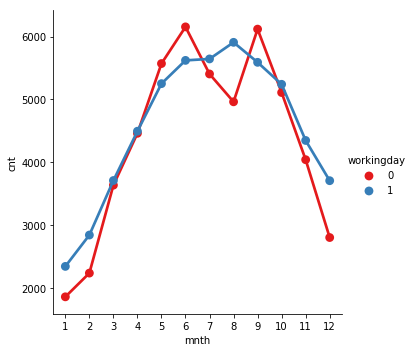

In [14]:
sns.factorplot('mnth','cnt',hue='workingday',data = day_df, ci=None, palette='Set1')

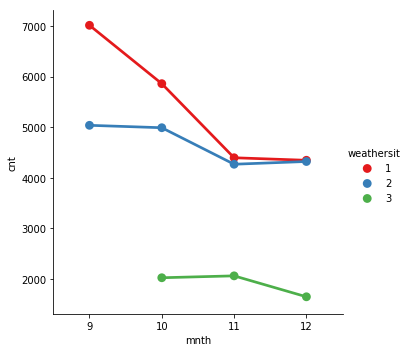

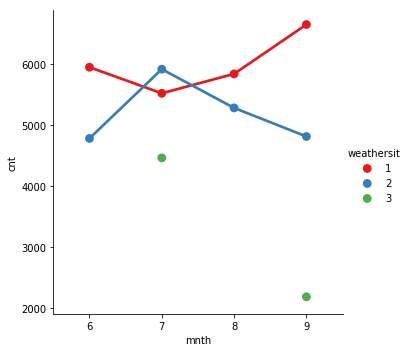

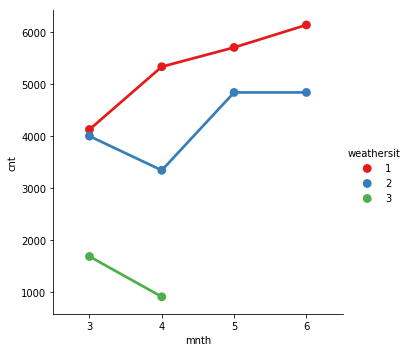

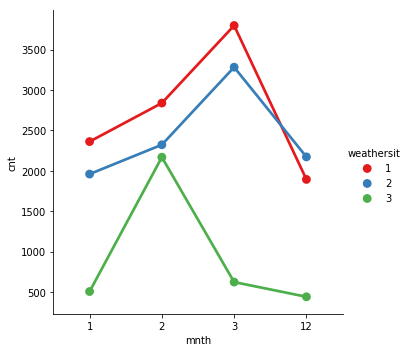

In [15]:
sns.factorplot('mnth','cnt',hue='weathersit',data = df_season_winter, ci=None, palette='Set1')
sns.factorplot('mnth','cnt',hue='weathersit',data = df_season_fall, ci=None, palette='Set1')
sns.factorplot('mnth','cnt',hue='weathersit',data = df_season_summer, ci=None, palette='Set1')
sns.factorplot('mnth','cnt',hue='weathersit',data = df_season_spring, ci=None, palette='Set1')

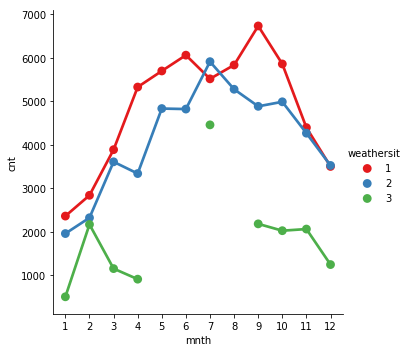

In [16]:
sns.factorplot('mnth','cnt',hue='weathersit',data = day_df, ci=None, palette='Set1')

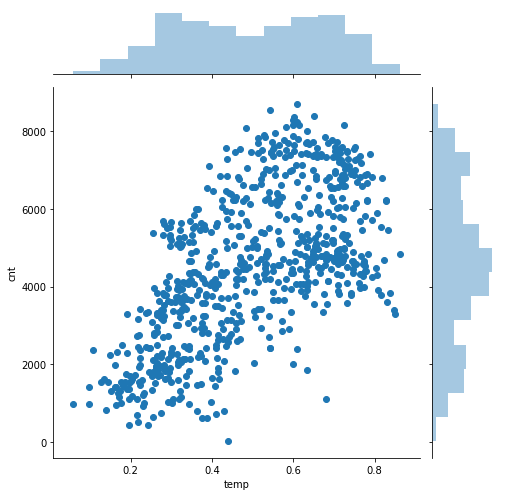

In [17]:
sns.jointplot('temp','cnt',data=day_df,height=7)

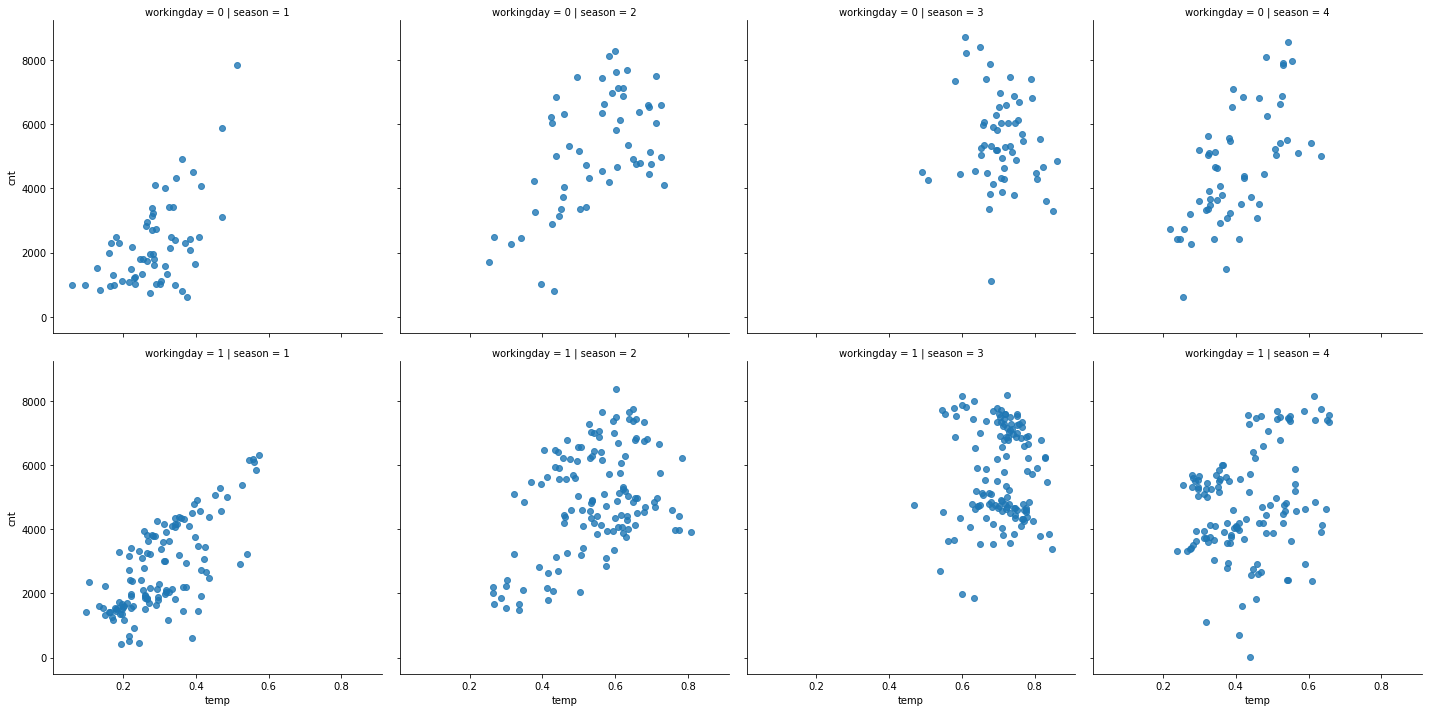

In [18]:
sns.lmplot('temp','cnt',row='workingday',col='season',data=day_df,palette='RdBu_r',fit_reg=False)

In [19]:
hour_df.drop('instant',axis=1,inplace=True)

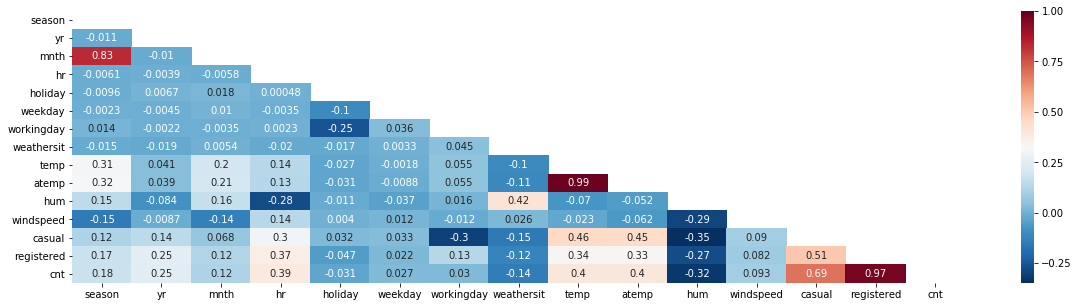

In [20]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(hour_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(hour_df.corr(),cmap='RdBu_r',mask=mask, annot=True)

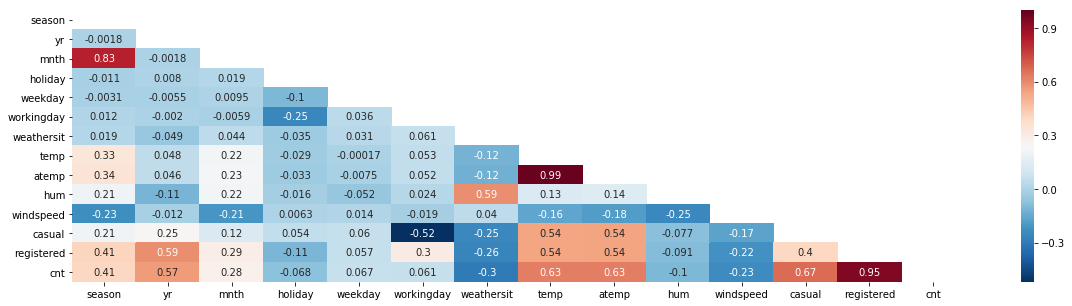

In [21]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(day_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(day_df.corr(),cmap='RdBu_r',mask=mask, annot=True)

In [22]:
df=pd.merge(day_df,hour_df,how='left',left_on='dteday',right_on='dteday')

In [23]:
df.head()

,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


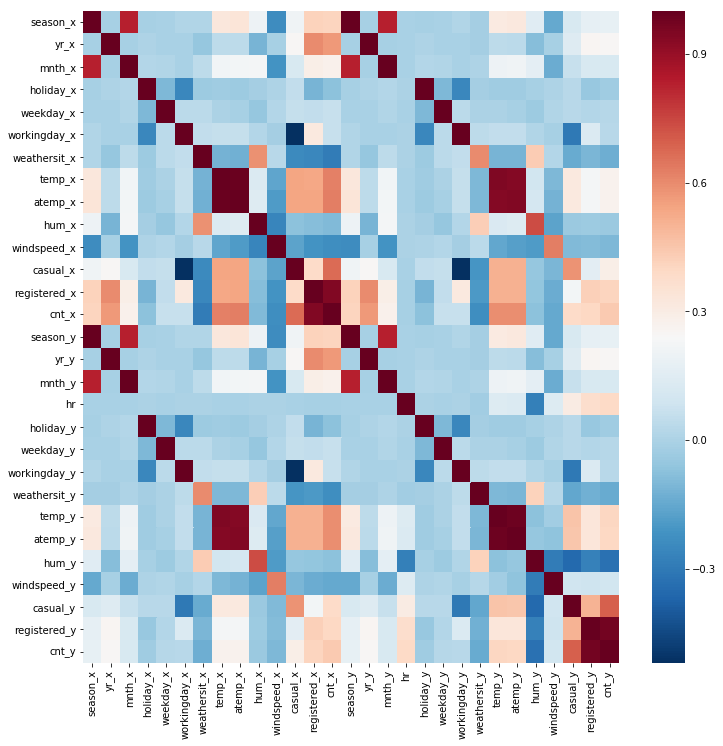

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='RdBu_r')

Cleaning of unused features

In [25]:
bikes_hour_df = hour_df.drop(['casual', 'registered'], axis=1)

Number Summary of The Bike Rental Count 'cnt' Feature

Text(0.5, 0.98, 'Recorded Bike Rental Counts')

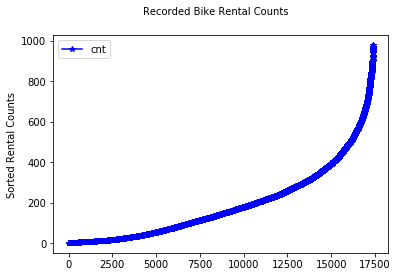

In [26]:
fig, ax = plt.subplots(1)
ax.plot(sorted(bikes_hour_df['cnt']), color = 'blue', marker = '*', label='cnt')
ax.legend(loc= 'upper left')
ax.set_ylabel('Sorted Rental Counts', fontsize = 10)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 10)

Quantitative Features vs. Rental Counts

Text(0, 0.5, 'Count of all Biks Rented')

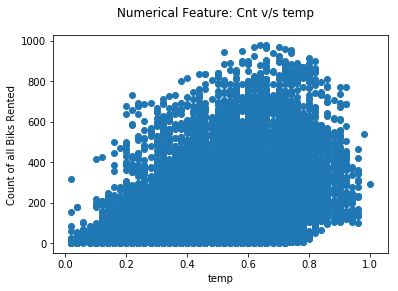

In [27]:
plt.scatter(bikes_hour_df['temp'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

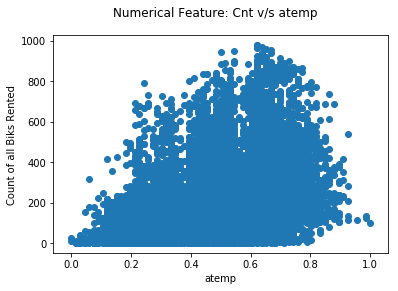

In [28]:
plt.scatter(bikes_hour_df['atemp'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

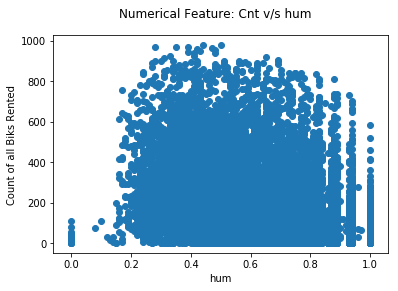

In [29]:
plt.scatter(bikes_hour_df['hum'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

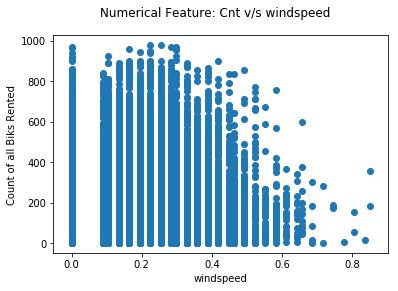

In [30]:
plt.scatter(bikes_hour_df['windspeed'], bikes_hour_df['cnt'])
plt.suptitle('Numerical Feature: Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

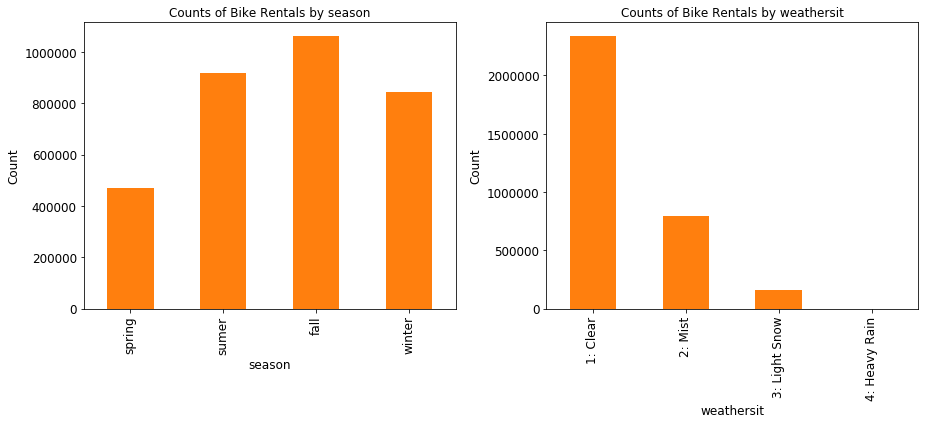

In [31]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = bikes_hour_df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = bikes_hour_df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

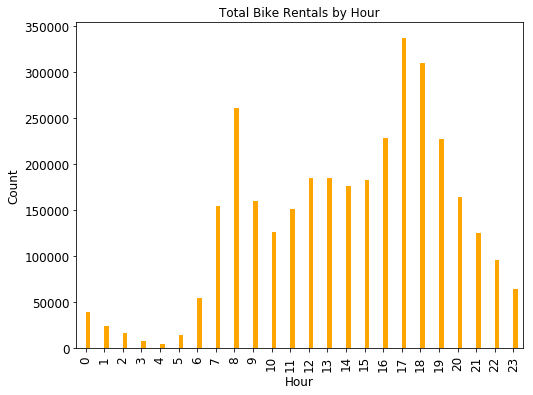

In [32]:
ax = bikes_hour_df[['hr','cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Hour", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

## Preparing the Data for Modeling

In [33]:
bike_day_df=pd.read_csv('../input/bike-sharing-dataset/day.csv')
bike_hour_df=pd.read_csv('../input/bike-sharing-dataset/hour.csv')

In [34]:
bikes_hour_df = bike_hour_df.drop(['casual' , 'registered'], axis=1)

### Feature Engineering : Leveraging Time-Series

In [35]:
# prior hours
bikes_hour_df_shift = bikes_hour_df[['dteday','hr','cnt']].groupby(['dteday','hr']).sum().reset_index()
bikes_hour_df_shift.sort_values(['dteday','hr'])
# shift the count of the last two hours forward so the new count can take in consideratio how the last two hours went 
bikes_hour_df_shift['sum_hr_shift_1'] = bikes_hour_df_shift.cnt.shift(+1)
bikes_hour_df_shift['sum_hr_shift_2'] = bikes_hour_df_shift.cnt.shift(+2)

bike_df_model_ready =  pd.merge(bikes_hour_df, bikes_hour_df_shift[['dteday', 'hr', 'sum_hr_shift_1', 'sum_hr_shift_2']], how='inner', on = ['dteday', 'hr'])

# drop NAs caused by our shifting fields around
bike_df_model_ready = bike_df_model_ready.dropna()

outcome = 'cnt'
# create a feature list for each modeling - experiment by adding features to the exclusion list
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday','casual', 'registered']]  

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, np.ravel(y_train))
predictions = model_gbr.predict(X_test)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))

Root Mean squared error: 41.98


In [36]:
np.mean(bikes_hour_df_shift['sum_hr_shift_1'])

189.47117044539073

In [37]:
# loop through each feature and calculate the R^2 score
features = ['hr', 'season', 'holiday', 'temp']
from sklearn import linear_model
from sklearn.metrics import r2_score

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)
    
for feat in features:
    model_lr = linear_model.LinearRegression()
    model_lr.fit(X_train[[feat]], y_train)
    predictions = model_lr.predict(X_test[[feat]])
    print('R^2 for %s is %f' % (feat, r2_score(y_test, predictions)))


R^2 for hr is 0.159431
R^2 for season is 0.025891
R^2 for holiday is -0.001242
R^2 for temp is 0.168313


In [38]:
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))
print('\n')
print('Intercept: %f' % model_lr.intercept_)

# features with coefficients 
feature_coefficients  = pd.DataFrame({'coefficients':model_lr.coef_[0], 
                                    'features':X_train.columns.values})

feature_coefficients.sort_values('coefficients')

Root Mean squared error: 148.22


Intercept: -103.609493


,coefficients,features
2,-28.296857,holiday
0,9.149312,hr
1,13.988868,season
3,311.148592,temp


### Predicting With Coefficients

In [39]:
INTERCEPT = -121.029547
COEF_HOLIDAY = -23.426176   # day is holiday or not
COEF_HOUR = 8.631624        # hour (0 to 23)
COEF_SEASON_1 = 3.861149    # 1:springer
COEF_SEASON_2 = -1.624812   # 2:summer
COEF_SEASON_3 = -41.245562  # 3:fall
COEF_SEASON_4 = 39.009224   # 4:winter
COEF_TEMP = 426.900259      # norm temp in Celsius -8 to +39

In [40]:
np.mean(X_train['holiday'])

0.029104661678862123

In [41]:
np.mean(X_train['hr'])

11.543615884239086

In [42]:
np.mean(X_train['temp'])

0.49786730247471817

In [43]:
MEAN_HOLIDAY = 0.0275   # day is holiday or not
MEAN_HOUR = 11.6        # hour (0 to 23)
MEAN_SEASON_1 = 1       # 1:spring
MEAN_SEASON_2 = 0       # 2:summer
MEAN_SEASON_3 = 0       # 3:fall
MEAN_SEASON_4 = 0       # 4:winter
MEAN_TEMP = 0.4967      # norm temp in Celsius -8 to +39

# try predicting something - 9AM with all other features held constant
rental_counts = INTERCEPT + (MEAN_HOLIDAY * COEF_HOLIDAY) \
    + (9 * COEF_HOUR) \
    + (MEAN_SEASON_1 * COEF_SEASON_1)  + (MEAN_SEASON_2 * COEF_SEASON_2) \
    + (MEAN_SEASON_3 * COEF_SEASON_3)  + (MEAN_SEASON_4 * COEF_SEASON_4) \
    + (MEAN_TEMP * COEF_TEMP)

print('Estimated bike rental count for selected parameters: %i' % int(rental_counts))    

Estimated bike rental count for selected parameters: 171
